In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

In [66]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from autocorrect import Speller
from googletrans import Translator, constants
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import numpy as geek
import researchpy as rp
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.utils import resample
# For handling string
import string
# For performing mathematical operations
import math
from bs4 import BeautifulSoup
import requests, json
from sklearn.preprocessing import LabelEncoder
from afinn import Afinn
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from nrclex import NRCLex

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kensaroven/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kensaroven/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kensaroven/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kensaroven/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [67]:
df = pd.read_excel("IMB767-XLS-ENG.xlsx", sheet_name = "Data after removing duplicates")

In [68]:
df.head(50)

,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
0,Trip Advisor,3612,2014-04-30,To commercial,"This reativly new temple was a big hindu version of Disney Land.... Quite expensive entrance for a temple. I accept the religious dress code so i was not alowed to enter in shorts. I had to rent an Indian lunghi, male long dress. The guards was not polite, almost unfriendly. One lady guard was about to destroy my expensive camera wich i had to leave outside. Inside the temple it was to follow the marked way. Somwhere you was blessed by some holy man. But everywhere there was stands with different things for sale. Worst was the way out with an enormous market with holy souvenirs of different quality, most kitscy plastic things"" made in China"". The holy experience i had looked forward to have dissapeared in a commercial thing. All they wanted was my money.",2,NEGATIVE
1,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,Me and my friends enjoyed a lot in ISKCON temple Its a one of the most biggest temple in Bangalore and you have to visit it,5,POSITIVE
2,Trip Advisor,???? ?,2016-07-28,A well maintained temple,Otherworldly vibrations throuout the sanctuary. Over all excellent experience 2 eateries inside. Free annadana prasadam full dinners in evening. Kichdi prasadam constantly accessible,5,POSITIVE
3,Trip Advisor,????? ?,2016-08-23,Temple,"ISKCON temple is very good, located in west of cord road, Rajajinagar, Bangalore. It in hill and the god Sri Krishna is very good. Please visit this place.",5,POSITIVE
4,Google + HK HILL,????? Anil,2015-11-27,NaN,This is a very good place to be for all the devotees and those who believe in the ultimate God.,4,POSITIVE
5,Facebook,?????? ????? ???? ????????,2016-11-27,NaN,"Amazing, you come here from the comfort of God rejoice in the memory.",5,POSITIVE
6,Google + HK HILL,?HÁ?ØW G,2016-08-02,NaN,Awsome..,5,POSITIVE
7,Trip Advisor,_sharmilap37,2017-03-29,Visit to iskcon,"If you are a spiritual person you will love Iskcon its a great place for meditation and bhajan, its a wonderful Temple",5,POSITIVE
8,Trip Advisor,0iamsid0,2017-01-03,Fully commercialized place,"Place is good and is situated in a hilltop. However, the place is fully commercialized and for everything you need money.",4,NEGATIVE
9,Trip Advisor,1 All over,2017-04-02,Off the beaten path,"I went sightseeing in three people. Wide in unexpectedly, it is the most deep atmosphere in the way of local. Worship barefoot. People of shorts will visit dressed in cloth (rental). Yes Snack Corner, ants and souvenirs, is there a buffet restaurant, it has to some extent touristy, is only less expensive that the local-friendly, is heterogeneous. Worship time will take quite. Severe in 1 hour.",5,POSITIVE


In [69]:
df.shape

(4641, 7)

## Question 1. What are the issues with given text data and discuss what type of pre-processing would be required?

In [70]:
df['text'].head(100)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                This reativly new temple was a big hindu version of Disney Land.... Quite expensive entrance for a temple. I accept the religious dress code so i was not alowed to enter in shorts. I had to rent an Indian lunghi, male long dress. The guards was not polite, almost unfriendly. One lady guard was about to destroy

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4641 entries, 0 to 4640
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SOURCE          4638 non-null   object        
 1   REVIEW BY       4640 non-null   object        
 2   REVIEW DATE     4641 non-null   datetime64[ns]
 3   REVIEW SUBJECT  2766 non-null   object        
 4   text            4637 non-null   object        
 5   REVIEW RATING   4641 non-null   int64         
 6   REVIEW TYPE     4641 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 253.9+ KB


In [72]:
df.isnull().sum()

SOURCE               3
REVIEW BY            1
REVIEW DATE          0
REVIEW SUBJECT    1875
text                 4
REVIEW RATING        0
REVIEW TYPE          0
dtype: int64

#### Evaluate the Review subject column

In [73]:
df['REVIEW SUBJECT'].head(50)

0                                To commercial
1                ?Amazing temple in Bangalore?
2                     A well maintained temple
3                                       Temple
4                                          NaN
5                                          NaN
6                                          NaN
7                              Visit to iskcon
8                   Fully commercialized place
9                          Off the beaten path
10                   Peaceful and Serene place
11            Huge Temple but kind of mall ! !
12              A Krishna temple on a hillock.
13                Peaceful and well maintained
14                              Place of peace
15                                 Divine Food
16                               Worth a visit
17    A neat and clean temple with a long walk
18                               Lovely temple
19                            Beautiful Temple
20                   Awesome sculpture and art
21           

In [74]:
df['REVIEW SUBJECT'].fillna("", inplace = True)

In [75]:
df['REVIEW SUBJECT']=df['REVIEW SUBJECT'].apply(lambda x: x.split(', |_|!|\+|.'))

### Evaluate the text column

In [76]:
for index,text in enumerate(df['text'][35:80]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 Wonderful trip to meet Lord Krishna . Godly presence of dear Radha and Krishna is joyous harmony and union
Review 2:
 Abhay Charanaravinda Bhaktivedanta Swami Prabhupada founded Iskon in 1966 iskon commonly known as hare krishna movement He initiated thousands of Americansand inspite of anti cult acts he got the credit from many religious scholars including Thomas hopkins the temple is largest one and inaugurated by shankar ddayal sharma in 1997 the main shrine is radha krishna and with beautiful decorations every day different colurs of clothes and ornaments which is reallyastonishingt to be seen in few temples like in dwaraka also the priest takes pains to decorate dwarakeshwar which i had seen and relished iskon temple is in north karnataka in rajaji nagar Address: Hare Krishna Hill, Chord Road, Rajaji Nagar, Bengaluru, Karnataka 560010 District: Bengaluru Hours: Open from· 4:15?5AM, 7:15AM?1PM, 4:15?8:20PM Phone: 080 2357 8347 the gajastumba is gold plated 56 ft high and

Some of the preprocessings to be accomplished before taking off the stop words, tokenization and BOW are:
  1. Punctuations needed to be taken care of
  2. Contractions correction
  3. Slang correction
  4. Lower case translation
  5. Remove digits and words having digits

#### 1. Punctuations to take care

In [77]:
df['text'].fillna("", inplace = True)

In [78]:
df['cleaned_text']=df['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#### 2. Contractions correction

In [79]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [80]:
# Regular expression for finding contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['cleaned_text']=df['cleaned_text'].apply(lambda x:expand_contractions(x))

#### 3. Slang Correction

In [81]:
resp = requests.get("http://www.netlingo.com/acronyms.php")
soup = BeautifulSoup(resp.text, "html.parser")
slangdict= {}
key=""
value=""
for div in soup.findAll('div', attrs={'class':'list_box3'}):
    for li in div.findAll('li'):
        for a in li.findAll('a'):
            key =a.text
            value = li.text.split(key)[1]
            slangdict[key]=value

with open('myslang.json', 'w') as f:
    json.dump(slangdict, f, indent=2)

In [82]:
slangdict

{'!': 'I have a comment',
 '#FF': 'Follow Friday',
 '(U)': 'it means arms around you, hug for you',
 '*$': 'Starbucks',
 '**//': 'it means wink wink, nudge nudge',
 ',!!!!': 'Talk to the hand',
 '/R/': 'Requesting',
 '02': 'Your (or my) two cents worth, also seen as m.',
 '10Q': 'Thank you',
 '1174': 'Nude club',
 '121': 'One to one',
 '123': 'it means I agree',
 '1337': 'Elite -or- leet -or- L337',
 '14': 'it refers to the fourteen words',
 '142n8ly': 'Unfortunately',
 '143': 'I love you',
 '1432': 'I Love You Too',
 '14AA41': 'One for All and All for One',
 '182': 'I hate you',
 '187': 'it means murder/ homicide',
 '19': '0 hand',
 '1daful': 'it means wonderful',
 '1V4': 'One Vs. Four',
 '2': 'it means to, too, two',
 '20': 'Location',
 '24/7': 'Twenty Four Seven, as in all the time',
 '2b': 'To be',
 '2B or not 2B': 'To Be Or Not To Be',
 '2b@': 'To Be At',
 '2BZ4UQT': 'Too Busy For You Cutey',
 '2B~not2B': 'To be or not to be',
 '2d4': 'To die for',
 '2day': 'Today',
 '2DLoo': 'Too

In [83]:
for key,value in slangdict.items():
    if key in df['cleaned_text']:
        df['cleaned_text']=df['cleaned_text'].replace(key,value)

#### 4. Lower Case Translation

In [84]:
df['cleaned_text']=df['cleaned_text'].apply(lambda x: x.lower())

#### 5. Remove digits and words containing digits

In [85]:
df['cleaned_text']=df['cleaned_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

### Answer: Issues with given text data - Some of the issues we found with the dataset is as follows.
1. Lack of uniformity or standardization - the text has a mix of lower case and upper case letters, presence of digits or numbers
2. Noise - the text contains slang, abbreviations or contractions, grammatical errors
3. Repeated information - some of the feedback provided consists of repeated information and some text is not very relevant to the analysis 
4. Ambiguity in terms of making sense of the information provided, vague meaning
5. Visual representation - Text contains punctuation marks  
#### Some of these issues have been fixed in the pre-processing stage and mentioned below.

### Types of pre-processing required in the given dataset is as follows.
1. Fixing the punctuations 
2. Expanding the abbreviations or contractions of words
3. Updating the dataset by removing slangs
4. Converting all the words in lower case to make it even
5. Removing words that contain digits and also removing digits or numbers from the dataset 

## Question 2. Discuss a few exploratory data analyses (EDA) and trend analyses that can be carried out on the given text data? 

Some of the EDA techniques to be followed are:
1. Tokenization
2. Stop word removal
3. BOW - Unigram
4. BOW - Bigram

#### 1. Tokenization

In [86]:
df['cleaned_text'] = df.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)

#### 2. Stop words removal

In [87]:
stp_wrds = stopwords.words('english')
stp_wrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [88]:
df['cleaned_text'] = df.apply(lambda row: [word for word in row['cleaned_text'] if word not in stp_wrds], axis = 1)

#### 3. Lemmetization

In [89]:
lemmatizer = nltk.stem.WordNetLemmatizer()

#Lemmatizer
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

df['text_lemmatized'] = df['cleaned_text'].apply(lemmatize_text)

In [90]:
df.head(50)

,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE,cleaned_text,text_lemmatized
0,Trip Advisor,3612,2014-04-30,[To commercial],"This reativly new temple was a big hindu version of Disney Land.... Quite expensive entrance for a temple. I accept the religious dress code so i was not alowed to enter in shorts. I had to rent an Indian lunghi, male long dress. The guards was not polite, almost unfriendly. One lady guard was about to destroy my expensive camera wich i had to leave outside. Inside the temple it was to follow the marked way. Somwhere you was blessed by some holy man. But everywhere there was stands with different things for sale. Worst was the way out with an enormous market with holy souvenirs of different quality, most kitscy plastic things"" made in China"". The holy experience i had looked forward to have dissapeared in a commercial thing. All they wanted was my money.",2,NEGATIVE,"[reativly, new, temple, big, hindu, version, disney, land, quite, expensive, entrance, temple, accept, religious, dress, code, alowed, enter, shorts, rent, indian, lunghi, male, long, dress, guards, polite, almost, unfriendly, one, lady, guard, destroy, expensive, camera, wich, leave, outside, inside, temple, follow, marked, way, somwhere, blessed, holy, man, everywhere, stands, different, things, sale, worst, way, enormous, market, holy, souvenirs, different, quality, kitscy, plastic, things, made, china, holy, experience, looked, forward, dissapeared, commercial, thing, wanted, money]","[reativly, new, temple, big, hindu, version, disney, land, quite, expensive, entrance, temple, accept, religious, dress, code, alowed, enter, short, rent, indian, lunghi, male, long, dress, guard, polite, almost, unfriendly, one, lady, guard, destroy, expensive, camera, wich, leave, outside, inside, temple, follow, marked, way, somwhere, blessed, holy, man, everywhere, stand, different, thing, sale, worst, way, enormous, market, holy, souvenir, different, quality, kitscy, plastic, thing, made, china, holy, experience, looked, forward, dissapeared, commercial, thing, wanted, money]"
1,Trip Advisor,9573519851,2015-07-24,[?Amazing temple in Bangalore?],Me and my friends enjoyed a lot in ISKCON temple Its a one of the most biggest temple in Bangalore and you have to visit it,5,POSITIVE,"[friends, enjoyed, lot, iskcon, temple, one, biggest, temple, bangalore, visit]","[friend, enjoyed, lot, iskcon, temple, one, biggest, temple, bangalore, visit]"
2,Trip Advisor,???? ?,2016-07-28,[A well maintained temple],Otherworldly vibrations throuout the sanctuary. Over all excellent experience 2 eateries inside. Free annadana prasadam full dinners in evening. Kichdi prasadam constantly accessible,5,POSITIVE,"[otherworldly, vibrations, throuout, sanctuary, excellent, experience, eateries, inside, free, annadana, prasadam, full, dinners, evening, kichdi, prasadam, constantly, accessible]","[otherworldly, vibration, throuout, sanctuary, excellent, experience, eatery, inside, free, annadana, prasadam, full, dinner, evening, kichdi, prasadam, constantly, accessible]"
3,Trip Advisor,????? ?,2016-08-23,[Temple],"ISKCON temple is very good, located in west of cord road, Rajajinagar, Bangalore. It in hill and the god Sri Krishna is very good. Please visit this place.",5,POSITIVE,"[iskcon, temple, good, located, west, cord, road, rajajinagar, bangalore, hill, god, sri, krishna, good, please, visit, place]","[iskcon, temple, good, located, west, cord, road, rajajinagar, bangalore, hill, god, sri, krishna, good, please, visit, place]"
4,Google + HK HILL,????? Anil,2015-11-27,[],This is a very good place to be for all the devotees and those who believe in the ultimate God.,4,POSITIVE,"[good, place, devotees, believe, ultimate, god]","[good, place, devotee, believe, ultimate, god]"
5,Facebook,?????? ????? ???? ????????,2016-11-27,[],"Amazing, you come here from the comfort of God rejoice in the memory.",5,POSITIVE,"[amazing, come, comfort, god, rejoice, memo

### Answer: Some of the exploratory data analyses (EDA) and trend analyses that can be carried out on any text data include 
1. Sentiment analysis in which we identify the sentiment or emotional tone of the text data and divide it into buckets or categories like positive, neutral or negative.
2. Word Frequency analysis in which we count the number of times each word appears in the text. By analysing the frequency of words, we can identify common themes, topics or keywords in the text.
3. Word Cloud - it is an extension of word frequency analysis where a word cloud is created based on the frequency of words appearing in the text.
4. Topic Modeling is used to derive specific topics or themes for further review. 
5. Trend Analysis - It analyzes changes in words frequency or usage of specific words over time. This can be used to understand any change in trend or pattern.
6. Network Analysis - It analyzes relationship between words and sentences in a given text and helps to identify any pattern or trend in the data.

### Some of the methods we used in our analysis are as follows.  
1. Tokenization - We used this method to break down the given text into tokens or individual words using the NLTK (Natural Language Toolkit) library. 
2. Stop word removal - We then removed stop words in our dataset. These are some of the commonly used or prevalent words in the english language.
3. Lemmatization - On the reformed dataset, we then did lemmatization. In this method, the words are reduced or converted to their base words or a dictionary form of words. We used this method to simplify the given text, reduce noise, improve accuracy in the text analysis.

## Question 3. Perform feature extraction and feature selection for sentiment analysis.

Some of the feature techniques are as follows:
1. BOW - Unigram
2. BOW - Bigram
3. TF-IDF

#### 1. BOW - Unigram

In [91]:
corpus = df['text_lemmatized'].to_list()

In [92]:
df['text_string'] = [','.join(map(str, l)) for l in df['text_lemmatized']]

In [93]:
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix_uni = word_vectorizer.fit_transform(df['text_string'])
df_unigram = pd.DataFrame(sparse_matrix_uni.toarray())
df_unigram.columns = word_vectorizer.get_feature_names()

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [94]:
frequencies = sum(sparse_matrix_uni).toarray()[0]
words_count = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
words_count.sort_values(by='frequency',inplace=True,ascending=False)
words_count.head()

,frequency
temple,4696
place,2692
krishna,1786
visit,1698
hare,1300


#### 2. BOW - Bigram

In [95]:
word_vectorizer_bi = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix_bi = word_vectorizer_bi.fit_transform(df['text_string'])
df_bi = pd.DataFrame(sparse_matrix_bi.toarray())
df_bi.columns = word_vectorizer_bi.get_feature_names()

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [96]:
frequencies_bi = sum(sparse_matrix_bi).toarray()[0]
words_count_bi = pd.DataFrame(frequencies_bi, index=word_vectorizer_bi.get_feature_names(), columns=['frequency'])
words_count_bi.sort_values(by='frequency',inplace=True,ascending=False)
words_count_bi.head()

,frequency
hare krishna,523
iskcon temple,398
must visit,397
lord krishna,386
well maintained,288


#### 3. TF-IDF

In [97]:
v = TfidfVectorizer()
sparse_matrix_tfidf = v.fit_transform(df['text_string'])
tf_idf_df = pd.DataFrame(sparse_matrix_tfidf.toarray(), columns=v.get_feature_names())

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [98]:
tfidf_weight = sum(sparse_matrix_tfidf).toarray()[0]

words_tfidf = pd.DataFrame(tfidf_weight, index=v.get_feature_names(), columns=['TF-IDF Weight'])
words_tfidf.sort_values(by='TF-IDF Weight',inplace=True,ascending=False)
words_tfidf.head()

,TF-IDF Weight
temple,330.641063
place,295.436200
good,187.155908
nice,183.358529
visit,181.934773


### Answer: Some of the feature extraction we used on the given dataset is tokenization, lemmatization and stop word removal. The techniques of feature selection we used are elaborated below.

1. Bag of Words (BOW) - Unigram: Unigram is the most commonly used feature in BOW and represents a single word in a text document that appears the most frequently. From our analysis above, we found the maximum frequency or Top 5 words to be "temple", "place", "krishna", "visit" and "hare". 

2. BOW - Bigram: It uses two consecutive words. We find the maximum frequency for words - "hare krishna", "iskcon temple", "must visit", "lord krishna" and "well maintained". It can be said that bigram gives a better perspective of the sentiment or improves the sentiment analysis as it provides additional or more complete context. It clearly captures relationships between words. 

3. TF-IDF (Term Frequency-Inverse Document Frequency): It considers the frequency of each word in the given text and frequency in the entire corpus. This method helps us identify important words, those words that might be common but are rare words in the overall corpus. We found that "temple" has the maximum TF-IDF weight of 330.6, this means that it occurs the most frequently in the text. It is followed by the words - "place", "good", "nice" and "visit". It can be concluded that overall there seem to be a positive feedback or review from the visitors as words like good and nice appear in the Top 5 with maximum TF-IDF weight. This can be further used for sentiment analysis. 

### In general, from the above 3 feature selection we can conclude that words like "temple", "place", "visit" appear the most often in all these techniques.

## Question 4. Develop a Bayes-supervised learning model to predict the sentiment of a review.  

In [99]:
df_nb = df[['text_lemmatized','REVIEW TYPE']]

In [100]:
df_nb['REVIEW TYPE'].value_counts()

POSITIVE    4002
MIXED        277
NEGATIVE     270
NEUTRAL       92
Name: REVIEW TYPE, dtype: int64

In [101]:
review = {'POSITIVE':2,
         'MIXED':1,
         'NEGATIVE':-1,
         'NEUTRAL':0}
      
df_nb['REVIEW TYPE'] = df_nb['REVIEW TYPE'].map(review)

/var/folders/r6/1g8m0xd94_7blqsglzmqftd40000gn/T/ipykernel_33842/3735532072.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nb['REVIEW TYPE'] = df_nb['REVIEW TYPE'].map(review)


In [102]:
df_nb.head()

,text_lemmatized,REVIEW TYPE
0,"[reativly, new, temple, big, hindu, version, disney, land, quite, expensive, entrance, temple, accept, religious, dress, code, alowed, enter, short, rent, indian, lunghi, male, long, dress, guard, polite, almost, unfriendly, one, lady, guard, destroy, expensive, camera, wich, leave, outside, inside, temple, follow, marked, way, somwhere, blessed, holy, man, everywhere, stand, different, thing, sale, worst, way, enormous, market, holy, souvenir, different, quality, kitscy, plastic, thing, made, china, holy, experience, looked, forward, dissapeared, commercial, thing, wanted, money]",-1
1,"[friend, enjoyed, lot, iskcon, temple, one, biggest, temple, bangalore, visit]",2
2,"[otherworldly, vibration, throuout, sanctuary, excellent, experience, eatery, inside, free, annadana, prasadam, full, dinner, evening, kichdi, prasadam, constantly, accessible]",2
3,"[iskcon, temple, good, located, west, cord, road, rajajinagar, bangalore, hill, god, sri, krishna, good, please, visit, place]",2
4,"[good, place, devotee, believe, ultimate, god]",2


In [103]:
mnb = MultinomialNB()

In [104]:
# X -> features, y -> label
X = sparse_matrix_uni
y = df_nb['REVIEW TYPE']
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)  
bayes = mnb.fit(X_train, y_train)
y_pred = bayes.predict(X_test)

In [105]:
cf_matrix=pd.DataFrame(confusion_matrix(y_test, y_pred), 
                       columns = ['NEGATIVE','NEUTRAL','MIXED','POSITIVE'],
                       index = ['NEGATIVE','NEUTRAL','MIXED','POSITIVE'])
print('Confusion Matrix:')
cf_matrix

Confusion Matrix:


,NEGATIVE,NEUTRAL,MIXED,POSITIVE
NEGATIVE,6,0,5,39
NEUTRAL,1,0,1,17
MIXED,1,0,4,53
POSITIVE,5,4,9,784


In [106]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.46      0.12      0.19        50
           0       0.00      0.00      0.00        19
           1       0.21      0.07      0.10        58
           2       0.88      0.98      0.93       802

    accuracy                           0.85       929
   macro avg       0.39      0.29      0.30       929
weighted avg       0.80      0.85      0.82       929



In [107]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print("Multinomial naive bayes AUC: {0}".format(metrics.auc(fpr, tpr)))

Multinomial naive bayes AUC: 0.47513757472584034


#### CHI-SQUARED TESTS

In [108]:
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df['text_string'])
X_chi = np.where(sparse_matrix.toarray()>=1,1,0)
X_chs = pd.DataFrame(data = X_chi ,columns=word_vectorizer.get_feature_names_out())
X_chs['feedback']= df_nb['REVIEW TYPE']

In [109]:
y_chi = X_chs['feedback']

In [110]:
crosstab, test_results, expected = rp.crosstab(X_chs['iskcon'].astype(object), y_chi,test= "chi-square",
                                               expected_freqs= True)

In [111]:
crosstab

feedback                     
feedback       -1   0    1     2   All
iskcon                                
0             239  81  231  3424  3975
1              31  11   46   578   666
All           270  92  277  4002  4641

In [112]:
expected

feedback                                    
feedback         -1          0           1            2
iskcon                                                 
0         231.25404  78.797673  237.249515  3427.698772
1          38.74596  13.202327   39.750485   574.301228

In [113]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,3.4119
1,p-value =,0.3324
2,Cramer's V =,0.0271


### Answer: We performed the following steps while developing Bayes-supervised learning model to predict the sentiment of a review.

1. Converted the review types to numbers for easier analysis. We gave value of 2 to POSITIVE review, 1 to MIXED review, -1 to NEGATIVE review, and 0 to NEUTRAL review.
2. Split the dataset into training and test dataset with a 80:20 ratio.
3. Built the confusion matrix using all 4 types of review and after classification we got the following results.
Precision is highest for positive review = 88% and recall is also highest for positive review = 98%. 
F1 score is 93% for positive review and is close to 100%, which means that our model is doing a good job in prediciting positive reviews (93%). 
Based on support, we can say that 802 words have a positive review or sentiment.
4. We get the Multinomial naive bayes AUC = 0.475, this means that overall the performance of classifier is not good, as it is not able to classify positive and negative reviews very well.
5. In the end, we did Chi-Square test and found the results of p-value to be high, meaning that we can probably reject null hypothesis and say that the model is not able to signify difference between review sentiments. 


## Question 5. Discuss the sampling strategy you would be using for the given dataset. What will be your strategy for dealing with the imbalanced dataset? 

Some basic EDAs to consider:


In [114]:
# Count the number of examples in each class
counts = df['REVIEW TYPE'].value_counts()
print(counts)

POSITIVE    4002
MIXED        277
NEGATIVE     270
NEUTRAL       92
Name: REVIEW TYPE, dtype: int64


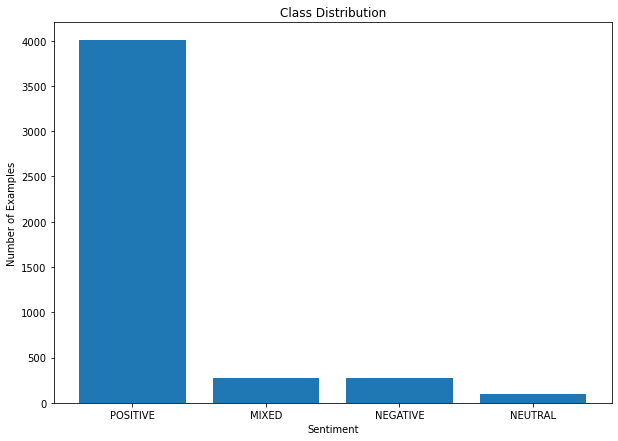

In [115]:
# Create a bar chart of the class distribution
plt.figure(figsize = (10,7))
plt.bar(counts.index, counts.values)
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Examples')
plt.show()

#### UNDERSAMPLING

/var/folders/r6/1g8m0xd94_7blqsglzmqftd40000gn/T/ipykernel_33842/916942881.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_resampled = pd.concat([pd.Series(['Positive']*len(downsampled_majority_class)),


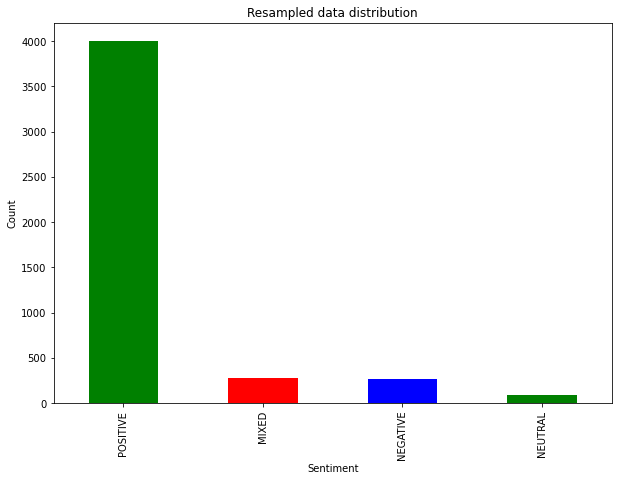

In [116]:
# Random undersampling
y = df['REVIEW TYPE']
# Separate majority and minority classes
majority_class = df[y=='Positive']
minority_class = df[y!='Positive']
# Downsample majority class
downsampled_majority_class = resample(majority_class, 
                                     replace=False,    # sample without replacement
                                     n_samples=min(len(majority_class), len(minority_class)), # match minority class or majority class, whichever is smaller
                                     random_state=42) # reproducible results
# Combine minority class with downsampled majority class
X_resampled = pd.concat([downsampled_majority_class, minority_class])
y_resampled = pd.concat([pd.Series(['Positive']*len(downsampled_majority_class)), 
                         pd.Series(y[y!='Positive'])])

# Resampled data distribution graph
plt.figure(figsize=(10,7))
y_resampled.value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Resampled data distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [117]:
undersample = NearMiss(version=1, n_neighbors=2)
X_undersample, y_undersample = undersample.fit_resample(X, y)
X_undersample.shape

(368, 8898)

#### OVERSAMPLING

In [118]:
# Convert 'REVIEW TYPE' to numerical data using label encoding
le = LabelEncoder()
df['Review_type_num'] = le.fit_transform(df['REVIEW TYPE'])

In [119]:
df['Review_type_num'].value_counts()

3    4002
0     277
1     270
2      92
Name: Review_type_num, dtype: int64

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Review_type_num', ylabel='count'>

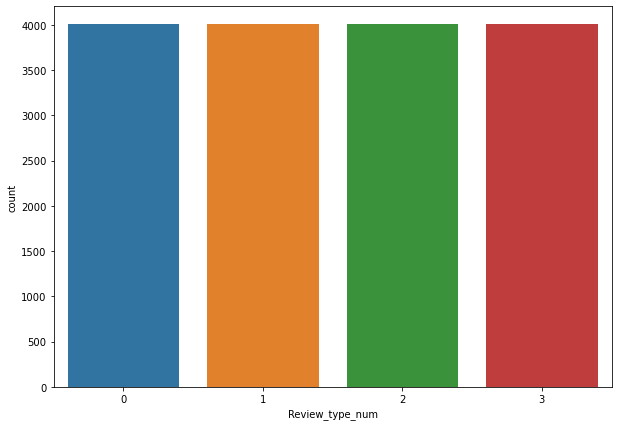

In [120]:
# Separate features and target variable
X_over = df.drop(['REVIEW TYPE', 'SOURCE', 'REVIEW BY', 'REVIEW DATE','REVIEW SUBJECT','text', 'cleaned_text',
                 'text_lemmatized', 'text_string'], axis=1)
y_over = df['Review_type_num']

# Apply SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_over, y_over)

# Convert back to original labels
X_resampled['Review_type_num'] = y_resampled

# Plot the data distribution
plt.figure(figsize = (10,7))
sns.countplot(y_resampled)

### Answer:  Before proceeding to sampling, we did basic EDA on dataset and found that the POSITIVE review appears 4002 times, followed by MIXED and NEGATIVE with 277 and 270 frequency. NEUTRAL review appears only 92 times. Thus, there is class imbalance in the dataset and hence we used two sampling strategies as mentioned below. 

1. Undersampling - In this, we reduce the number of instances in the majority class to balance the number of instances in the minority class. This can be done by randomly selecting a subset of instances from the majority class until the number of instances in the majority class is equal to or closer to the number of instances in the minority class.

2. Oversampling - In this, we increase the number of instances in the minority class by randomly duplicating instances from the minority class until the number of instances in the minority class is equal to or closer to the number of instances in the majority class. Oversampling can be done using various techniques such as Random Oversampling, Synthetic Minority Oversampling Technique (SMOTE), Adaptive Synthetic Sampling (ADASYN). We see above, that after oversampling all the 4 sentiment reviews have equal value = 4000.


## Question 6. Discuss lexicon-based approaches to predict the sentiment of a review. 

In [121]:
df['text_string_space'] = df["text_string"].replace(",", " ", regex=True)

#### AFINN Lexicon

In [122]:
df_afinn = df.copy()

In [123]:
path = "/Users/kensaroven/Desktop/Rotman Resources/RSM 8415 Service Analytics/Assignments/4/"
file=open(path+"AFINN-111.txt","r")
affin_txt=file.read()
affin_txt=affin_txt.split('\n')
affin_txt

['abandon\t-2',
 'abandoned\t-2',
 'abandons\t-2',
 'abducted\t-2',
 'abduction\t-2',
 'abductions\t-2',
 'abhor\t-3',
 'abhorred\t-3',
 'abhorrent\t-3',
 'abhors\t-3',
 'abilities\t2',
 'ability\t2',
 'aboard\t1',
 'absentee\t-1',
 'absentees\t-1',
 'absolve\t2',
 'absolved\t2',
 'absolves\t2',
 'absolving\t2',
 'absorbed\t1',
 'abuse\t-3',
 'abused\t-3',
 'abuses\t-3',
 'abusive\t-3',
 'accept\t1',
 'accepted\t1',
 'accepting\t1',
 'accepts\t1',
 'accident\t-2',
 'accidental\t-2',
 'accidentally\t-2',
 'accidents\t-2',
 'accomplish\t2',
 'accomplished\t2',
 'accomplishes\t2',
 'accusation\t-2',
 'accusations\t-2',
 'accuse\t-2',
 'accused\t-2',
 'accuses\t-2',
 'accusing\t-2',
 'ache\t-2',
 'achievable\t1',
 'aching\t-2',
 'acquit\t2',
 'acquits\t2',
 'acquitted\t2',
 'acquitting\t2',
 'acrimonious\t-3',
 'active\t1',
 'adequate\t1',
 'admire\t3',
 'admired\t3',
 'admires\t3',
 'admiring\t3',
 'admit\t-1',
 'admits\t-1',
 'admitted\t-1',
 'admonish\t-2',
 'admonished\t-2',
 'adopt\t1

In [124]:
# creating dictionary from slang (which is list)
affin_dict=dict()
for line in affin_txt:
    temp=line.split("\t")
    affin_dict[temp[0]] = int(temp[-1])
affin_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [126]:
df_afinn['AFINN_score'] = ''
for i, row in df_afinn.iterrows():
    df_afinn.at[i, 'AFINN_score'] = sum(map(lambda word: affin_dict.get(word, 0),row['text_lemmatized']))

In [127]:
df_afinn['Afinn_sentiment'] = ["Positive" if x > 0 else "Negative" for x in df_afinn['AFINN_score']]

In [128]:
df_afinn.groupby('Afinn_sentiment').size()

Afinn_sentiment
Negative     581
Positive    4060
dtype: int64

#### Text Blob

In [129]:
df_txt_blob = df.copy()

In [130]:
# Define a function to get the sentiment score for a piece of text
def get_sentiment_score(text):
    if isinstance(text, float) and np.isnan(text):
        return 0.0
    else:
        text = str(text)
        blob = TextBlob(text)
        return blob.sentiment.polarity

# Convert non-string values in the 'text' column to empty strings
df_txt_blob['text_string_space'] = df_txt_blob['text_string_space'].apply(lambda x: '' if not isinstance(x, str) else x)

# Apply the function to the 'text' column and create a new column for the sentiment score
df_txt_blob['sentiment_score'] = df_txt_blob['text_string_space'].apply(get_sentiment_score)

# Define a function to convert the sentiment score to a sentiment label ('positive', 'neutral', or 'negative')
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score == 0:
        return 'neutral'
    else:
        return 'negative'

# Create a new column for the sentiment label
df_txt_blob['sentiment_label'] = df_txt_blob['sentiment_score'].apply(get_sentiment_label)

# Print the first few rows of the dataframe with the sentiment score and label columns added
df_txt_blob.head()

,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE,cleaned_text,text_lemmatized,text_string,Review_type_num,text_string_space,sentiment_score,sentiment_label
0,Trip Advisor,3612,2014-04-30,[To commercial],"This reativly new temple was a big hindu version of Disney Land.... Quite expensive entrance for a temple. I accept the religious dress code so i was not alowed to enter in shorts. I had to rent an Indian lunghi, male long dress. The guards was not polite, almost unfriendly. One lady guard was about to destroy my expensive camera wich i had to leave outside. Inside the temple it was to follow the marked way. Somwhere you was blessed by some holy man. But everywhere there was stands with different things for sale. Worst was the way out with an enormous market with holy souvenirs of different quality, most kitscy plastic things"" made in China"". The holy experience i had looked forward to have dissapeared in a commercial thing. All they wanted was my money.",2,NEGATIVE,"[reativly, new, temple, big, hindu, version, disney, land, quite, expensive, entrance, temple, accept, religious, dress, code, alowed, enter, shorts, rent, indian, lunghi, male, long, dress, guards, polite, almost, unfriendly, one, lady, guard, destroy, expensive, camera, wich, leave, outside, inside, temple, follow, marked, way, somwhere, blessed, holy, man, everywhere, stands, different, things, sale, worst, way, enormous, market, holy, souvenirs, different, quality, kitscy, plastic, things, made, china, holy, experience, looked, forward, dissapeared, commercial, thing, wanted, money]","[reativly, new, temple, big, hindu, version, disney, land, quite, expensive, entrance, temple, accept, religious, dress, code, alowed, enter, short, rent, indian, lunghi, male, long, dress, guard, polite, almost, unfriendly, one, lady, guard, destroy, expensive, camera, wich, leave, outside, inside, temple, follow, marked, way, somwhere, blessed, holy, man, everywhere, stand, different, thing, sale, worst, way, enormous, market, holy, souvenir, different, quality, kitscy, plastic, thing, made, china, holy, experience, looked, forward, dissapeared, commercial, thing, wanted, money]","reativly,new,temple,big,hindu,version,disney,land,quite,expensive,entrance,temple,accept,religious,dress,code,alowed,enter,short,rent,indian,lunghi,male,long,dress,guard,polite,almost,unfriendly,one,lady,guard,destroy,expensive,camera,wich,leave,outside,inside,temple,follow,marked,way,somwhere,blessed,holy,man,everywhere,stand,different,thing,sale,worst,way,enormous,market,holy,souvenir,different,quality,kitscy,plastic,thing,made,china,holy,experience,looked,forward,dissapeared,commercial,thing,wanted,money",1,reativly new temple big hindu version disney land quite expensive entrance temple accept religious dress code alowed enter short rent indian lunghi male long dress guard polite almost unfriendly one lady guard destroy expensive camera wich leave outside inside temple follow marked way somwhere blessed holy man everywhere stand different thing sale worst way enormous market holy souvenir different quality kitscy plastic thing made china holy experience looked forward dissapeared commercial thing wanted money,-0.125852,negative
1,Trip Advisor,9573519851,2015-07-24,[?Amazing temple in Bangalore?],Me and my friends enjoyed a lot in ISKCON temple Its a one of the most biggest temple in Bangalore and you have to visit it,5,POSITIVE,"[friends, enjoyed, lot, iskcon, temple, one, biggest, temple, bangalore, visit]","[friend, enjoyed, lot, iskcon, temple, one, biggest, temple, bangalore, visit]","friend,enjoyed,lot,iskcon,temple,one,biggest,temple,bangalore,visit",3,friend enjoyed lot iskcon temple one biggest temple bangalore visit,0.500000,positive
2,Trip Advisor,???? ?,2016-07-28,[A well maintained temple],Otherworldly vibrations throuout the sanctuary. Over all excellent experience 2 eateries inside. Free annadana prasadam full dinners in evening. Kichdi prasadam constantl

In [131]:
df_txt_blob['sentiment_label'].value_counts()

positive    4042
neutral      466
negative     133
Name: sentiment_label, dtype: int64

In [132]:
cf_matrix=pd.DataFrame(confusion_matrix(df_txt_blob['REVIEW TYPE'].str.lower(), df_txt_blob['sentiment_label'].str.lower()), 
                       columns = ['NEGATIVE','NEUTRAL','MIXED','POSITIVE'],
                       index = ['NEGATIVE','NEUTRAL','MIXED','POSITIVE'])
print('Confusion Matrix:')
cf_matrix

Confusion Matrix:


,NEGATIVE,NEUTRAL,MIXED,POSITIVE
NEGATIVE,0,16,10,251
NEUTRAL,0,49,37,184
MIXED,0,5,9,78
POSITIVE,0,63,410,3529


In [133]:
# Compare the predicted sentiment labels with the actual labels
print(classification_report(df_txt_blob['REVIEW TYPE'].str.lower(), df_txt_blob['sentiment_label'].str.lower()))

              precision    recall  f1-score   support

       mixed       0.00      0.00      0.00       277
    negative       0.37      0.18      0.24       270
     neutral       0.02      0.10      0.03        92
    positive       0.87      0.88      0.88      4002

    accuracy                           0.77      4641
   macro avg       0.32      0.29      0.29      4641
weighted avg       0.77      0.77      0.77      4641



/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### VADER LEXICON

In [134]:
data_bing = df.drop(['REVIEW TYPE', 'REVIEW RATING'], axis = 1)

# Instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment label from the sentiment score
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Define a function to get the sentiment score using the Bing lexicon
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to the 'text' column and create a new column for the sentiment score
data_bing['sentiment_score'] = data_bing['text_string_space'].apply(get_sentiment_score)

# Define a function to convert the sentiment score to a sentiment label ('positive', 'neutral', or 'negative')
data_bing['sentiment_label'] = data_bing['sentiment_score'].apply(get_sentiment_label)

In [135]:
cf_matrix=pd.DataFrame(confusion_matrix(df['REVIEW TYPE'].str.lower(), data_bing['sentiment_label'].str.lower()), 
                       columns = ['NEGATIVE','NEUTRAL','MIXED','POSITIVE'],
                       index = ['NEGATIVE','NEUTRAL','MIXED','POSITIVE'])
print('Confusion Matrix:')
cf_matrix

Confusion Matrix:


,NEGATIVE,NEUTRAL,MIXED,POSITIVE
NEGATIVE,0,14,8,255
NEUTRAL,0,43,28,199
MIXED,0,2,5,85
POSITIVE,0,45,273,3684


In [136]:
# Performance Metrics
print("Classification Metrics:")
print(classification_report(df['REVIEW TYPE'].str.lower(), data_bing['sentiment_label'].str.lower()))

Classification Metrics:
              precision    recall  f1-score   support

       mixed       0.00      0.00      0.00       277
    negative       0.41      0.16      0.23       270
     neutral       0.02      0.05      0.02        92
    positive       0.87      0.92      0.90      4002

    accuracy                           0.80      4641
   macro avg       0.33      0.28      0.29      4641
weighted avg       0.78      0.80      0.79      4641



/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Answer: Some of the lexicon-based approaches we have used above in predicting the sentiment of a review is mentioned below.  
1. AFINN Lexicon (Affective Norms for English Words): It is a simple lexicon-based approach for sentiment analysis and consists of a list of words that have been manually assigned a polarity score. This score is a numerical value indicating the sentiment or emotion associated with that word. Each word is given a score ranging from -5 (most negative) to 5 (most positive), with 0 being neutral score. In our text above, AFINN score was assigned to a total of 4641 words. Here, we see that about 4060 positive reviews and about 581 negative reviews.

2. Text Blob - It is a pre-trained sentiment analysis model that can be used to classify the sentiment of text as positive, negative, or neutral. It uses a rule-based approach to assign polarity scores to individual words and then aggregates the scores to determine the overall sentiment of the text. The overall results, as shown above, of the confusion matrix and classification results are found to be better than previous ones. 

3. Vader Lexicon (Valence Aware Dictionary and sEntiment Reasoner) - It is a lexicon and rule-based sentiment analysis tool specifically designed for social media texts. It takes into account the nuances of social media language, such as the use of slang, emojis, and capitalization, in order to provide accurate sentiment analysis. Vader assigns each word in the text a polarity score, which ranges from -1 (most negative) to 1 (most positive), and also provides a compound score, which represents the overall sentiment of the text. The compound score is a normalized, weighted composite score that ranges from -1 to 1, where values above 0.05 are generally considered positive, values below -0.05 are considered negative, and values in between are considered neutral. The specific results of Vader Lexicon are shown above.


## Question 7. Develop an appropriate model to predict the emotion of a review. 

In [495]:
df_nrc = df.copy()

In [497]:
# Load the Emotion Lexicon dictionary NRC
nrc = pd.read_csv('/Users/kensaroven/Desktop/Rotman Resources/RSM 8415 Service Analytics/Assignments/4/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep='\t', header=None, names=['word', 'emotion', 'score'])

# Create a function to calculate the emotion scores
def get_emotion_scores(review):
    scores = {emotion:0 for emotion in nrc['emotion'].unique()}
    for word in review.split():
        matches = nrc[nrc['word']==word]
        for i in range(len(matches)):
            emotion = matches.iloc[i]['emotion']
            score = matches.iloc[i]['score']
            scores[emotion] += score
    return scores

# Calculate the total emotion scores for each review
df_nrc['emotion_scores'] = df_nrc['text_string_space'].apply(get_emotion_scores)
for emotion in nrc['emotion'].unique():
    df_nrc[emotion] = df_nrc['emotion_scores'].apply(lambda x: x[emotion])

# Predict the emotion label
df_nrc['emotion_label'] = df_nrc[nrc['emotion'].unique()].idxmax(axis=1)

In [498]:
df_nrc['emotion_label'].value_counts()

positive        2740
anticipation     691
anger            526
joy              446
trust            106
negative          61
disgust           37
fear              28
surprise           4
sadness            2
Name: emotion_label, dtype: int64

### Answer: As we can see from the emotion labels allotted by the model to different reviews, an overwhelming majority of the reviews view ISKON in a positive light. 

## Question 8. What are the comprehensive insights from this mining process? 

### Answer: A large majority of the people associate positive emotions with ISKON, this could also be a reflection fo ISKON's charitable activities outside of temples or even the religious, respectful aspect of deity worship. We can also see that the second major emotion is anticipation. This makes sense as well; ISKON is an extremely popular worldwide movement, which generates curiousity in its potential visitors. 
### Suprisingly, this is closely followed by anger. On closely reviewing the Question 4 output where we use a Bayes-supervised learning model for sentiment review, we can see the common theme in negative reviews revolves around the commercialization of the temple complex which many devotees feel takes away from true worship or the humble atmosphere of a supposed temple.
### Lastly, we can see that the negative emotions associated with ISKON are pretty low as compared to the positive emotions however, we can still comb through these reviews to get insights on how the temple can improve it's visitor experience.

## Question 9. What should be the strategy for the deployment of the model? 

### Answer: The most crucial step for the deployment of this model is data collection as currently the temple is using less-than-adequate and unreliable ways of data collection. In order to encourage people to fill in more feedback during the visit to the temple, the temple can look into installing electronic kiosks which provide information about the temple as well as allow feedback and suggestions. Additionally, we should build an automated pipeline to periodically scrape all popular social media websites for any relevant reviews instead of having the IT team manually search for them.
#### Following the data collection process, a pipeline needs to be setup for data pre-processing to clean the data and make it ready for analysis for the future steps.
#### Lastly, this data can be used to train the model and prepare it for future feedback review with greater accuracy.
#### Further down the line, this model can be extended to single out negative reviews and do a deeper textual analysis to find the core complaints or suggestions that visitors have for the temple which can then be converted into actionable insights.
#### Also, the IT team for ISKON needs to be trained for the upkeep and maintainence of the model inorder to make the process faster and more reliable.